# Sources Parameter Plots
#The purpose of this notebook is to plot different parameters of our ~30 target protoplanetary disks and their stars in order to confirm trends and looks for gaps in the paraemter space that could inform new areas of study.

In [2]:
from astropy.io import fits
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
#import plotnine

In [3]:
# Read in sources info sheet csv
data = pd.read_csv (r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Catalog (7.25).csv")

# 1. Star mass vs. Disk mass

In [4]:
# 1. Star mass vs. Disk mass


# Note, star mass is logged, while disk mass is not. Both are in solar mass units

# Conclusion: Disk mass is a difficult value to find, and its value varies depending on model used. 
# Stars with stellar mass between -0.7 and -0.4 (logM*) are not present and could be an area of future study. 


In [5]:
# define columns
df = pd.DataFrame(data, columns= ['Star','Mstar','Mdisk'])
# suppress rows with -99 values
df_loc = df.loc[df['Mdisk'] != -99]
# show table, print (df_loc)
print(df_loc)

# send values to plot
star_list = df_loc['Star'].tolist()
Mstar = df_loc['Mstar'].tolist()
Mdisk = df_loc['Mdisk'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


          Star     Mstar     Mdisk
0       HT Lup  1.698244  0.014018
1       GW Lup  0.457088  0.015015
2       IM Lup  0.891251  0.059063
3       RU Lup  0.630957  0.042619
4       Sz 114  0.173780  0.007961
5       Sz 129  0.831764  0.018565
6       MY Lup  1.230269  0.016997
9       AS 205  0.870964  0.029000
11    Elias 20  0.478630  0.029000
12     DoAr 25  0.954993  0.136000
17     WaOph 6  0.676083  0.077000
18      AS 209  0.831764  0.028000
21      TW Cha  1.100000  0.008803
22      VZ Cha  0.512861  0.018000
24  IRAS 04385  0.562341  0.002455
26      CI Tau  0.890000  0.040541
27      RY Lup  1.412538  0.027342


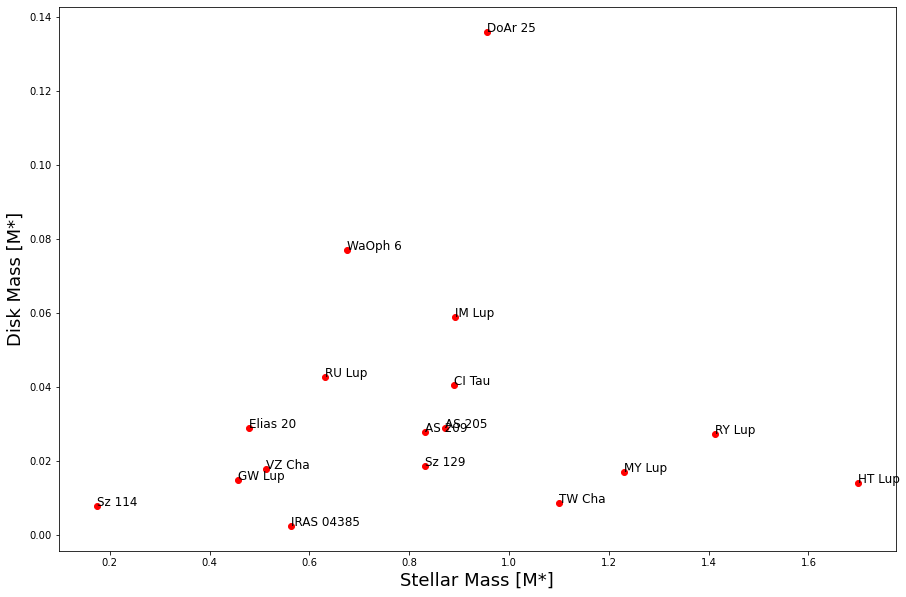

In [6]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mstar, Mdisk, 'ro')
for i, (x, y) in enumerate(zip(Mstar, Mdisk)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Stellar Mass [M*]',fontsize=18)
ax1.set_ylabel('Disk Mass [M*]',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion 6.27
Changes: Changed Log Mass to Mass in order to show a linear relationship. 
- Need to find additional disk masses
- Do not see much of a linear trend, which is strange
- Clear gap in study of stars much bigger than the sun 

# 2. Spectral Type vs. Age

In [7]:
# 2. Spectral Type vs. Age

# define columns
df_spec = pd.DataFrame(data, columns= ['Star','Spectral_Type','log_tstar'])
# suppress rows with -99 values
df_specclean = df_spec.loc[df_spec['log_tstar'] != -99]

print(df_specclean)

# Add a column to dataframe of spectral type as digits  
f = lambda s: s[0:2]
df_specclean['SpType2'] = df_specclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
# NOTE, currently pulling integer, not float, missing dec place. Not sure how to amend instruction #########
f = lambda s: order[s[0]]+s[1]
df_specclean['SpType2'] = df_specclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_spec2 = df_specclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

#print(df_spec2)

# send values to plot
star_list = df_spec2['Star'].tolist()
spectral_type2 = df_spec2['SpType2'].tolist()
star_age = df_spec2['log_tstar'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


         Star Spectral_Type  log_tstar
0      HT Lup            K2   5.900000
1      GW Lup          M1.5   6.300000
2      IM Lup            K5   5.700000
3      RU Lup            K7   5.700000
4      Sz 114            M5   6.000000
5      Sz 129            K7   6.600000
6      MY Lup            K0   7.000000
7   HD 142666            A8   7.100000
8   HD 143006            G7   6.600000
9      AS 205            K5   5.800000
10       SR 4            K7   5.900000
11   Elias 20            M0   5.900000
12    DoAr 25            K5   6.300000
13   Elias 24            K5   5.300000
14   Elias 27            M0   5.900000
15    DoAr 33            K4   6.200000
16     WSB 52            M1   5.800000
17    WaOph 6            K6   5.500000
18     AS 209            K5   6.000000
19  HD 163296            A1   7.100000
21     TW Cha            K7   6.633468
22     VZ Cha          M0.5   5.900000
23     GQ Lup          K5.0   6.000000
25     GK Tau          K6.5   6.079181
26     CI Tau          K5

C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\4008350889.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specclean['SpType2'] = df_specclean['Spectral_Type'].apply(f)
C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\4008350889.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specclean['SpType2'] = df_specclean['SpType2'].apply(f)


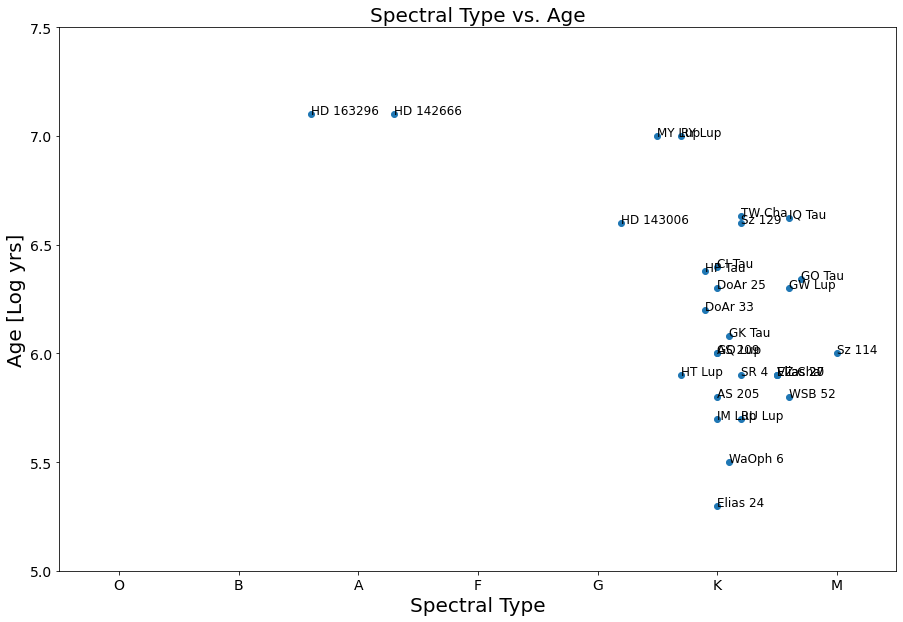

In [8]:
# x y plot

#fig=plt.figure(1,figsize=(18,10))
#ax1=fig.add_subplot(111)
#ax1.plot(spectral_type2, star_age, 'ro')
#for i, (x, y) in enumerate(zip(spectral_type2, star_age)):
    #ax1.text(x,y,star_list[i],fontsize=12)
#ax1.set_xlabel('Spectral Type',fontsize=18)
#ax1.set_ylabel('Age',fontsize=18)

# set ticks to OBAFGKM from digits
#ax1.set_xticks(np.arange(0, 60, step=10))
#ax1.set_xticks([0,10.,20.,30.,40.,50.,60.]) #,['O','B','A','F','G','K','M'])
#ax1.set_xticks(range(5,75,10))
#ax1.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(5, 7.5)
#ax.grid()
ax.set_title('Spectral Type vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Age [Log yrs]')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_spec2['SpType2'].astype(float), df_spec2['log_tstar'])

for i, (x, y) in enumerate(zip(df_spec2['SpType2'].astype(int), df_spec2['log_tstar'])):
    ax.text(x,y,star_list[i],fontsize=12)

           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)


#plt.savefig('spectype_vs_age6.27.pdf')   #, bbox_inches='tight')
plt.show()

Next steps:
- Add Star names 
- Add year error bars (confirm error prop conversion is correct first)

Conclusion:
- Good representation of range of ages (typical protstar phase is 100,000 (10^5) - 10,000,000 (10^7) years)
- Why are the oldest stars hotter? They should be farther along evolutionarily 
- Future areas of study:
    - O,B,F,G stars
    - Younger A,B stars



# 3. Spectral Type vs. Disk Mass

In [9]:
# 3. Spectral Type vs. Disk Mass

# define columns
df_specdisk = pd.DataFrame(data, columns= ['Star','Spectral_Type','Mdisk'])
#print(df_specdisk)
# suppress rows with -99 values
df_specdiskclean = df_specdisk.loc[df_specdisk['Mdisk'] != -99]

print(df_specdiskclean)

# Add a column to dataframe of spectral type as digits  # NOTE, currently pulling integer, not float, missing dec place
f = lambda s: s[0:2]
df_specdiskclean['SpType2'] = df_specdiskclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
f = lambda s: order[s[0]]+s[1]
df_specdiskclean['SpType2'] = df_specdiskclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_specdiskclean2 = df_specdiskclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

# print(df_spec2)

# send values to plot
star_list = df_specdiskclean2['Star'].tolist()
spectral_type2 = df_specdiskclean2['SpType2'].tolist()
disk_mass = df_specdiskclean2['Mdisk'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


          Star Spectral_Type     Mdisk
0       HT Lup            K2  0.014018
1       GW Lup          M1.5  0.015015
2       IM Lup            K5  0.059063
3       RU Lup            K7  0.042619
4       Sz 114            M5  0.007961
5       Sz 129            K7  0.018565
6       MY Lup            K0  0.016997
9       AS 205            K5  0.029000
11    Elias 20            M0  0.029000
12     DoAr 25            K5  0.136000
17     WaOph 6            K6  0.077000
18      AS 209            K5  0.028000
21      TW Cha            K7  0.008803
22      VZ Cha          M0.5  0.018000
24  IRAS 04385            M0  0.002455
26      CI Tau          K5.5  0.040541
27      RY Lup            K2  0.027342


C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\3047604159.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specdiskclean['SpType2'] = df_specdiskclean['Spectral_Type'].apply(f)
C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\3047604159.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specdiskclean['SpType2'] = df_specdiskclean['SpType2'].apply(f)


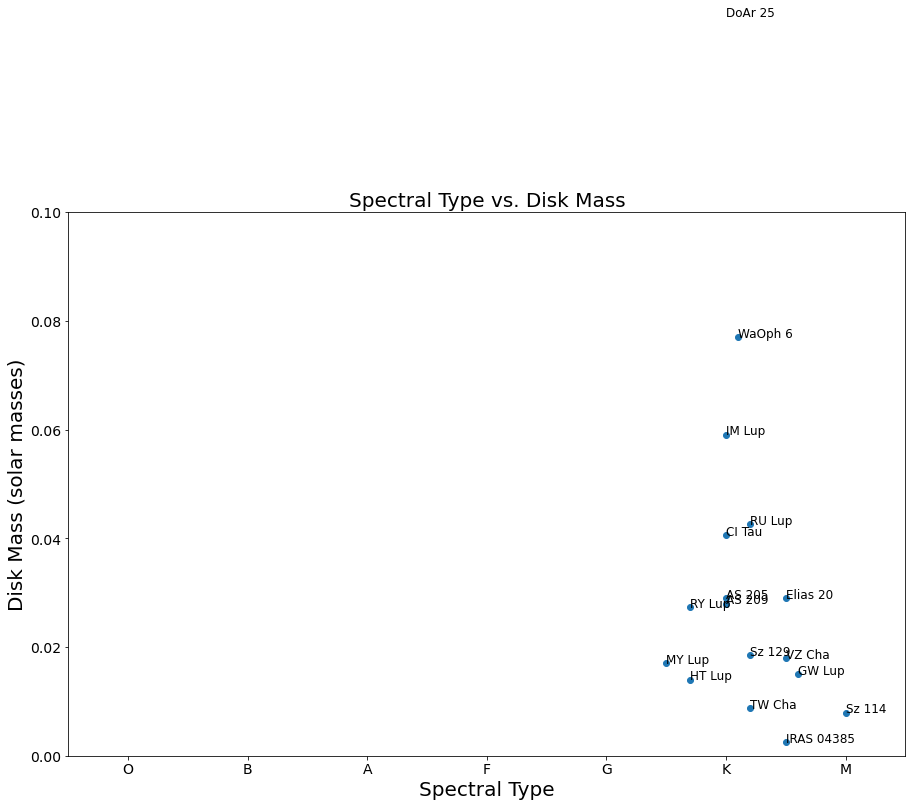

In [10]:
fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 0.1)
#ax.grid()
ax.set_title('Spectral Type vs. Disk Mass')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Disk Mass (solar masses)')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_specdiskclean2['SpType2'].astype(int), df_specdiskclean2['Mdisk'])
for i, (x, y) in enumerate(zip(df_specdiskclean2['SpType2'].astype(int), df_specdiskclean2['Mdisk'])):
    ax.text(x,y,star_list[i],fontsize=12)
           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)



plt.show()

Conclusion: 
- Disk masses clustered around 0.02 solar masses, G-M type stars
- Study heavier disk masses, 0.04 solar masses and greater, G-M type stars
- Study the disk masses of other spectral types, O-G

Next steps:
- Search for missing datapoints in the literature
- Add error bars (many are missing)

# 4. Spectral Type vs. Dust Radius

In [11]:
# 4. Spectral Type vs. Disk Radius

# define columns
df_specrad = pd.DataFrame(data, columns= ['Star','Spectral_Type','Rdust','uncertainty_Rdust_positive','uncertainty_Rdust_negative'])
#print(df_specdisk)
# suppress rows with -99 values
df_specradclean = df_specrad.loc[df_specrad['Rdust'] != -99]

#print(df_specradclean)

# Add a column to dataframe of spectral type as digits  # NOTE, currently pulling integer, not float, missing dec place
f = lambda s: s[0:2]
df_specradclean['SpType2'] = df_specradclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
f = lambda s: order[s[0]]+s[1]
df_specradclean['SpType2'] = df_specradclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_specradclean2 = df_specradclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

# print(df_spec2)

# send values to plot
star_list = df_specradclean2['Star'].tolist()
spectral_type2 = df_specradclean2['SpType2'].tolist()
disk_radius = df_specradclean2['Rdust'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

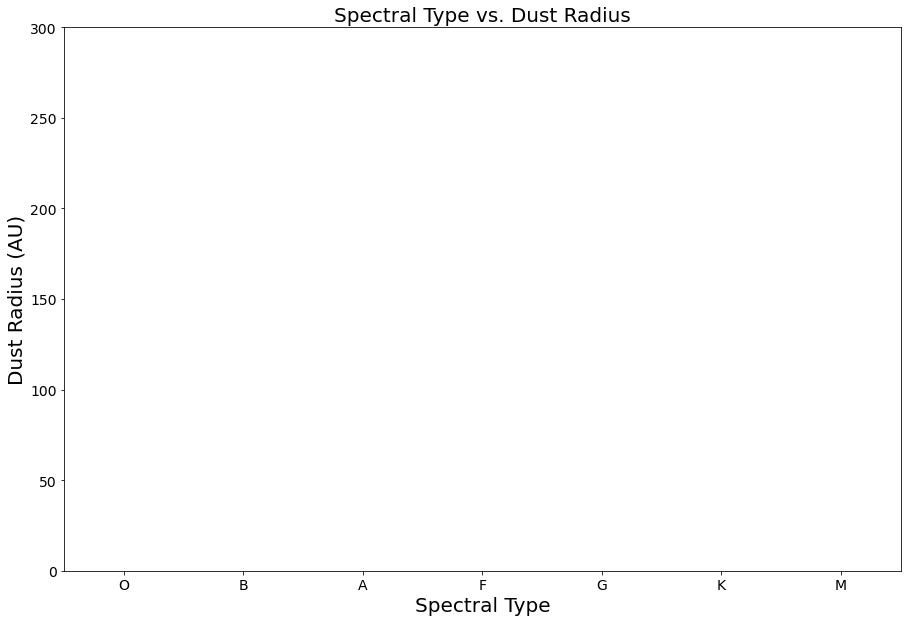

In [12]:
fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 300)
#ax.grid()
ax.set_title('Spectral Type vs. Dust Radius')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Dust Radius (AU)')
ax.yaxis.label.set_fontsize(20)

# define x and y, make sure spectral type is an integer
ax.scatter(df_specradclean2['SpType2'].astype(int), df_specradclean2['Rdust'])
# add the star names based on x and y def above
for i, (x, y) in enumerate(zip(df_specradclean2['SpType2'].astype(int), df_specradclean2['Rdust'])):
    ax.text(x,y,star_list[i],fontsize=12)
           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)



plt.show()

Conclusion:
- Range of dust radii well represented for K type stars
- Dust radius data for other spectral types needed

# 5. Disk Mass vs. Dust Radius

In [13]:
# define columns
df_massrad = pd.DataFrame(data, columns= ['Star','Mdisk','Rdust'])
# suppress rows with -99 values
df_massradclean = df_massrad.loc[df_massrad['Mdisk'] != -99]
# show table, 
#print (df_massradclean)
df_massradclean2 = df_massradclean.loc[df_massradclean['Rdust'] != -99]
#print(df_massradclean2)

# send values to plot
star_list = df_massradclean2['Star'].tolist()
Rdust = df_massradclean2['Rdust'].tolist()
Mdisk = df_massradclean2['Mdisk'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

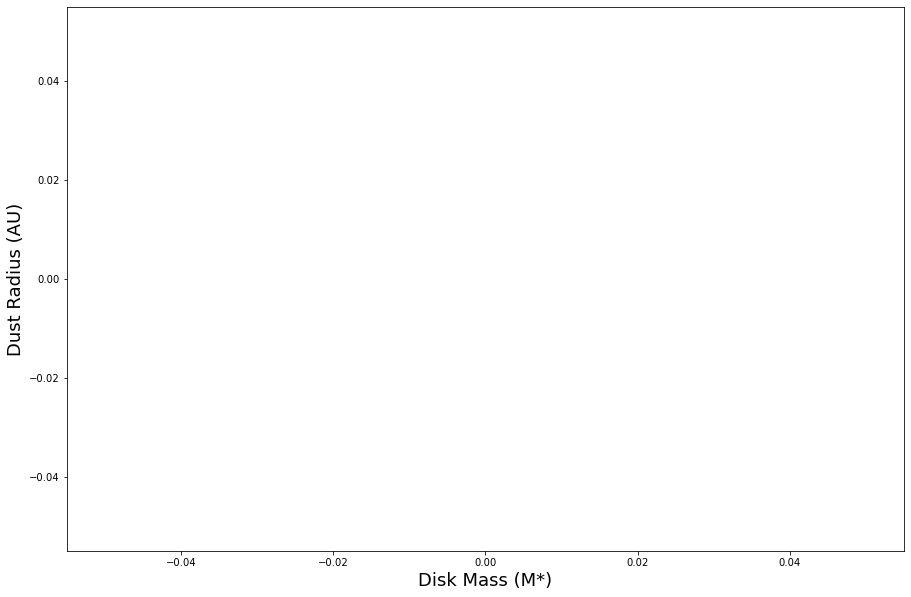

In [14]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mdisk, Rdust, 'ro')
for i, (x, y) in enumerate(zip(Mdisk, Rdust)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Mass (M*)',fontsize=18)
ax1.set_ylabel('Dust Radius (AU)',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion:
- Visual notes:
    - Expected correlation between low disk mass and smaller radius
    - But as disk mass grows, two "branches" occur, one where radius grows substantially with mass, the other where it grows slowly with disk mass

# 4.  Disk Inclination vs. Extinction

In [15]:
# define columns
df_avinc = pd.DataFrame(data, columns= ['Star','disk_inclination','uncertainty_disk_inclination_positive','uncertainty_disk_inclination_negative',
                                  'A_v'])
# suppress rows with -99 values
df_avincclean = df_avinc.loc[df_avinc['disk_inclination'] != -99]
# show table, 
#print (df_avincclean)
df_avincclean2 = df_avincclean.loc[df_avincclean['A_v']!= -99]
#print (df_avincclean2)

# send values to plot
star_list = df_avincclean2['Star'].tolist()
disk_inclination = df_avincclean2['disk_inclination'].tolist()
I_pos_unc = df_avincclean2['uncertainty_disk_inclination_positive'].tolist()
I_neg_unc = df_avincclean2['uncertainty_disk_inclination_negative'].tolist()
A_v = df_avincclean2['A_v'].tolist()


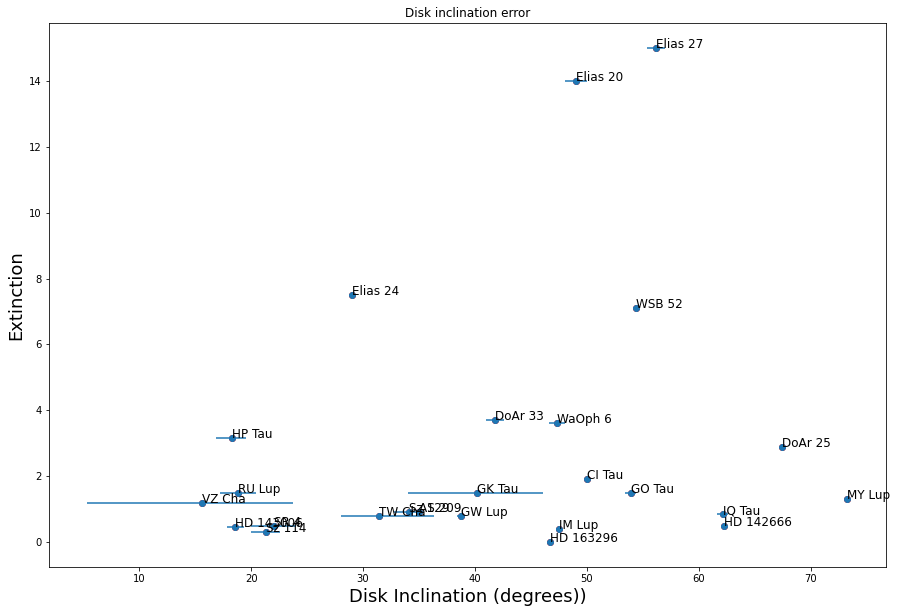

In [16]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(disk_inclination, A_v, 'ro')
for i, (x, y) in enumerate(zip(disk_inclination, A_v)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Inclination (degrees))',fontsize=18)
ax1.set_ylabel('Extinction',fontsize=18)

# error plot
Inclination_error = [I_neg_unc, I_pos_unc]
x = disk_inclination
y = A_v
ax1.errorbar(x, y, xerr=Inclination_error, fmt='o')
ax1.set_title('Disk inclination error')

plt.show()


Conclusion:
- Experimenting with the idea that disk inclination from Earth could impact extinction, just an experiement! Not sure what to draw from this.

# 7. Age vs. Number of Gaps

In [17]:
# 7. Age vs. Number of Gaps 

# define columns
df_agegaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','log_tstar'])
# suppress rows with -99 values
df_agegapsclean = df_agegaps.loc[df_agegaps['dark_gap_number'] != -99]

# print(df_spec)

# print(df_spec2)

# send values to plot
star_list = df_agegapsclean['Star'].tolist()
dark_gap_number = df_agegapsclean['dark_gap_number'].tolist()
star_age = df_agegapsclean['log_tstar'].tolist()


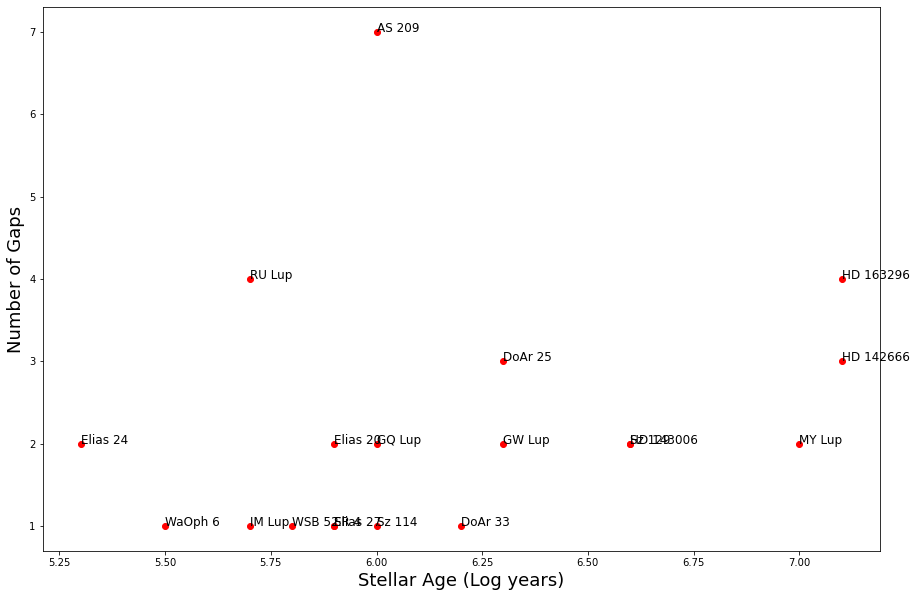

In [18]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(star_age, dark_gap_number, 'ro')
for i, (x, y) in enumerate(zip(star_age, dark_gap_number)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Stellar Age (Log years)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# NEXT: Confirm log error prop
# error plot
#Inclination_error = [I_neg_unc, I_pos_unc]
#x = disk_inclination
#y = A_v
#ax1.errorbar(x, y, xerr=Inclination_error, fmt='o')
#ax1.set_title('Disk inclination error')

plt.show()


Conclusion:
- Visually, there appears to be a trend between the number of dark gaps and the age of the star, indicating that gaps appear over time, likely as planets form.
- There are interesting outliers, particularly Elias 24, RU Lup, and AS 209, where gaps have formed at a younger age.
Next:
- Add age uncertainty
- Explore Elias 24, RU Lup, AS 209 commonalities, potential area of study

# 8. Distance vs. Number of Gaps

In [19]:
# 8. Distance vs. Number of Gaps 

# define columns
df_distgaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','Distance','Uncertainty_distance_positive','Uncertainty_distance_negative','Region_broad'])
# suppress rows with -99 values
df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]

# print(df_spec)

# print(df_spec2)

# send values to plot
star_list = df_distgapsclean['Star'].tolist()
dark_gap_number = df_distgapsclean['dark_gap_number'].tolist()
Distance = df_distgapsclean['Distance'].tolist()
dist_pos_unc = df_distgapsclean['Uncertainty_distance_positive'].tolist()
dist_neg_unc = df_distgapsclean['Uncertainty_distance_negative'].tolist()


C:\Users\pheretz\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\pheretz\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


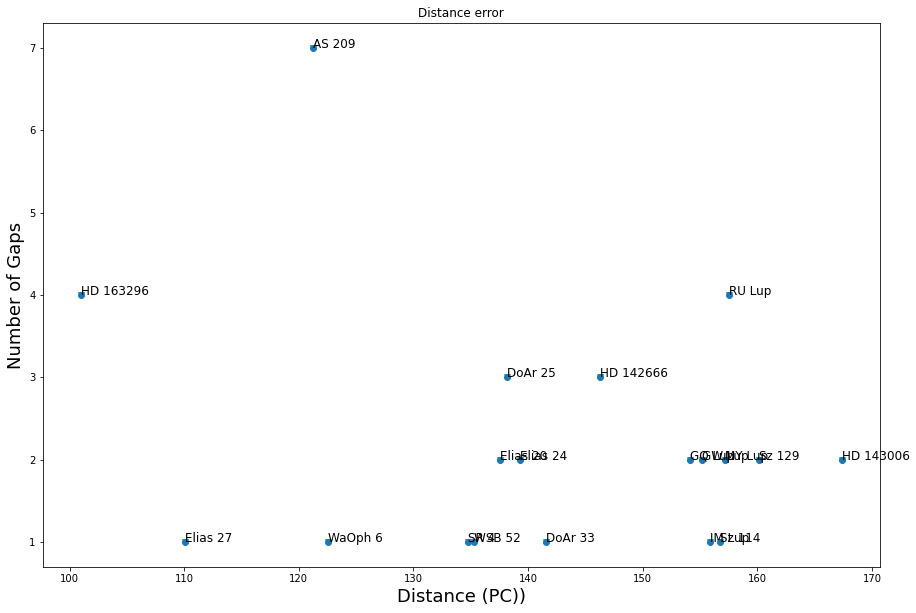

In [20]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
# To change marker by region, seems like I could segment the lists above, then have a list of (x,y,fmt,x,y,fmt) but that seems too 
# complicated. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py
# https://stackoverflow.com/questions/70121429/how-to-plot-scatter-graph-with-markers-based-on-column-value

ax1.plot(Distance, dark_gap_number, 'cv')
for i, (x, y) in enumerate(zip(Distance, dark_gap_number)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Distance (PC))',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
Distance_error = [dist_neg_unc, dist_pos_unc]
x = Distance
y = dark_gap_number
ax1.errorbar(x, y, xerr=Distance_error, fmt='o')
ax1.set_title('Distance error')

plt.show()


Conclusion:
- Experimenting with the idea that further disks may not be resolved as well as closer disks. Not sure if there are any conclusions here! Resolution has other factors as well. 
- Visually, it's interensting that the highest gaps come from the closest disks, HD 163296, AS 209

# 9. Temperature vs. Number of Gaps 

In [21]:
# define columns
df_tempgaps = pd.DataFrame(data, columns= ['Star','T_eff','dark_gap_number'])
# suppress rows with -99 values
df_tempgapsclean = df_tempgaps.loc[df_tempgaps['dark_gap_number'] != -99]
# show table, 
#print (df_tempgapsclean)
#df_diskmassgapclean2 = df_diskmassgapclean.loc[df_diskmassgapclean['dark_gap_number'] != -99]
#print(df_diskmassgapclean2)

# send values to plot
star_list = df_tempgapsclean['Star'].tolist()
dark_gaps = df_tempgapsclean['dark_gap_number'].tolist()
Temp = df_tempgapsclean['T_eff'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


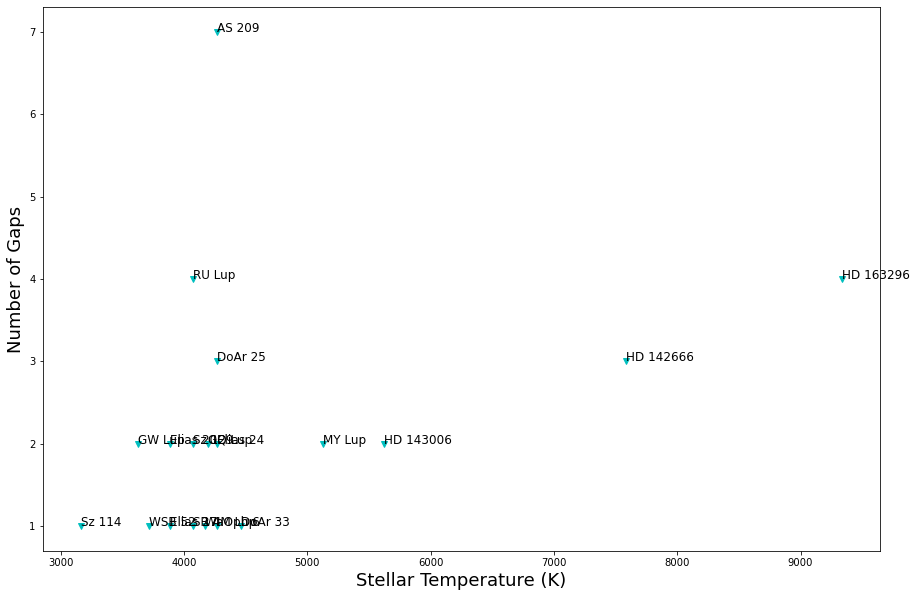

In [22]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Temp, dark_gaps, 'cv')
for i, (x, y) in enumerate(zip(Temp, dark_gaps)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Stellar Temperature (K)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion:
- Similar to spectral type, stars of higher temperatures (5000k +) are not well-represented in the sample
- Disks with a high number of gaps (>4) are not well-represented in the sample, though this could be a telescope resolution issue

# 10. Disk Mass vs. Number of Gaps

In [23]:
# define columns
df_diskmassgap = pd.DataFrame(data, columns= ['Star','Mdisk','dark_gap_number'])
# suppress rows with -99 values
df_diskmassgapclean = df_diskmassgap.loc[df_diskmassgap['Mdisk'] != -99]
# show table, 
#print (df_diskmassgapclean)
df_diskmassgapclean2 = df_diskmassgapclean.loc[df_diskmassgapclean['dark_gap_number'] != -99]
print(df_diskmassgapclean2)

# send values to plot
star_list = df_diskmassgapclean2['Star'].tolist()
dark_gaps = df_diskmassgapclean2['dark_gap_number'].tolist()
Mdisk = df_diskmassgapclean2['Mdisk'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


        Star     Mdisk  dark_gap_number
1     GW Lup  0.015015                2
2     IM Lup  0.059063                1
3     RU Lup  0.042619                4
4     Sz 114  0.007961                1
5     Sz 129  0.018565                2
6     MY Lup  0.016997                2
11  Elias 20  0.029000                2
12   DoAr 25  0.136000                3
17   WaOph 6  0.077000                1
18    AS 209  0.028000                7


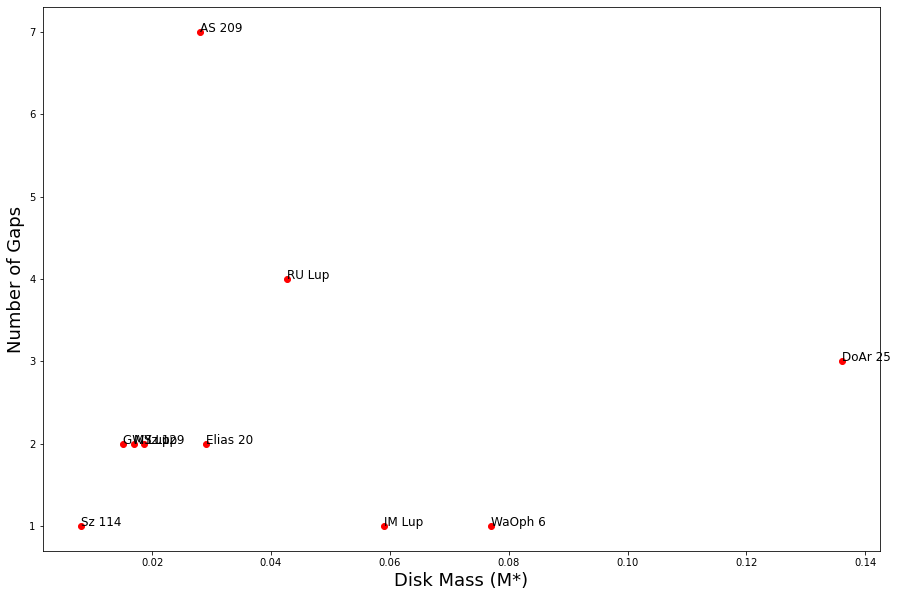

In [24]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mdisk, dark_gaps, 'ro')
for i, (x, y) in enumerate(zip(Mdisk, dark_gaps)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Mass (M*)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion:
- Visually, it does not look like we have enough data to determine trends between disk mass and the number of gaps, though there is a broad trend that as disk mass grows, the number of gaps grows
- AS 209 is another interesting outlier 

# 11. Dust Radius vs. Number of Gaps 

In [25]:
# define columns
df_radgaps = pd.DataFrame(data, columns= ['Star','Rdust','dark_gap_number'])
# suppress rows with -99 values
df_radgapsclean = df_radgaps.loc[df_radgaps['Rdust'] != -99]
# show table, 
#print (df_radgapsclean)
df_radgapsclean2 = df_radgapsclean.loc[df_radgapsclean['dark_gap_number'] != -99]
#print(df_radgapsclean2)

# send values to plot
star_list = df_radgapsclean2['Star'].tolist()
dark_gaps = df_radgapsclean2['dark_gap_number'].tolist()
Rdust = df_radgapsclean2['Rdust'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

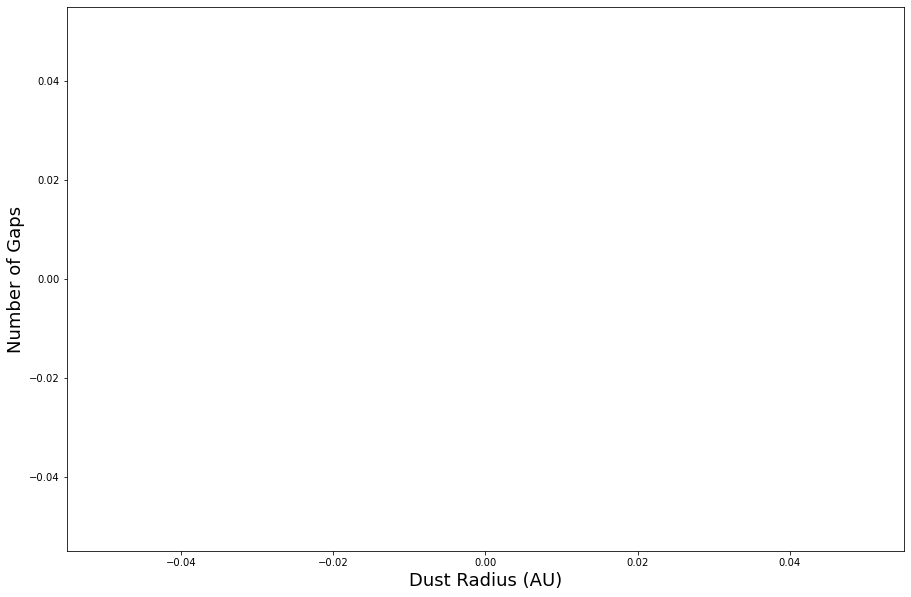

In [26]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Rdust, dark_gaps, 'ro')
for i, (x, y) in enumerate(zip(Rdust, dark_gaps)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Dust Radius (AU)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()


# IN PROGRESS Age Vs. Extinction

In [27]:
# define columns
df_ageav = pd.DataFrame(data, columns= ['Star','log_tstar','A_v'])
print(df_ageav)
# suppress rows with -99 values
#df_ageavclean = df_ageav.loc[df_ageav['disk_inclination'] != -99]
# show table, 
#print (df_avincclean)
#df_avincclean2 = df_avincclean.loc[df_avincclean['A_v']!= -99]
#print (df_avincclean2)

# send values to plot
#star_list = df_avincclean2['Star'].tolist()
#disk_inclination = df_avincclean2['disk_inclination'].tolist()
#I_pos_unc = df_avincclean2['uncertainty_disk_inclination_positive'].tolist()
#I_neg_unc = df_avincclean2['uncertainty_disk_inclination_negative'].tolist()
#A_v = df_avincclean2['A_v'].tolist()


          Star  log_tstar    A_v
0       HT Lup   5.900000   0.00
1       GW Lup   6.300000   0.80
2       IM Lup   5.700000   0.40
3       RU Lup   5.700000   1.50
4       Sz 114   6.000000   0.30
5       Sz 129   6.600000   0.90
6       MY Lup   7.000000   1.30
7    HD 142666   7.100000   0.50
8    HD 143006   6.600000   0.45
9       AS 205   5.800000   1.75
10        SR 4   5.900000   0.50
11    Elias 20   5.900000  14.00
12     DoAr 25   6.300000   2.90
13    Elias 24   5.300000   7.50
14    Elias 27   5.900000  15.00
15     DoAr 33   6.200000   3.70
16      WSB 52   5.800000   7.10
17     WaOph 6   5.500000   3.60
18      AS 209   6.000000   0.90
19   HD 163296   7.100000   0.00
20      FZ Tau -99.000000   3.50
21      TW Cha   6.633468   0.80
22      VZ Cha   5.900000   1.20
23      GQ Lup   6.000000   1.60
24  IRAS 04385 -99.000000 -99.00
25      GK Tau   6.079181   1.50
26      CI Tau   6.397940   1.90
27      RY Lup   7.000000   0.40
28      IQ Tau   6.623249   0.85
29      HP

IndexError: list index out of range

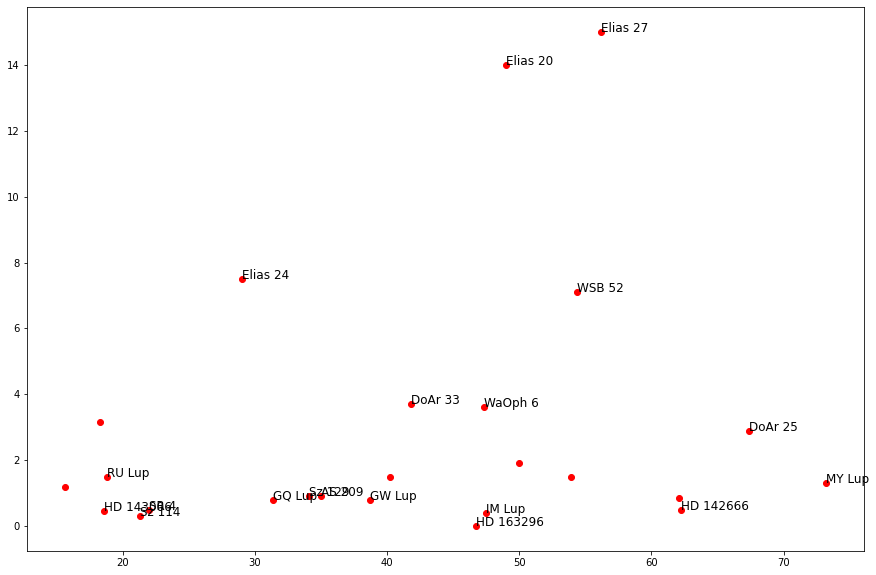

In [28]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(disk_inclination, A_v, 'ro')
for i, (x, y) in enumerate(zip(disk_inclination, A_v)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Inclination (degrees))',fontsize=18)
ax1.set_ylabel('Extinction',fontsize=18)

# error plot
Inclination_error = [I_neg_unc, I_pos_unc]
x = disk_inclination
y = A_v
ax1.errorbar(x, y, xerr=Inclination_error, fmt='o')
ax1.set_title('Disk inclination error')

plt.show()


# 13. Stellar Mass vs. Accretion Rate

In [29]:
# define columns
df_massrate = pd.DataFrame(data, columns= ['Star','Log_Mstar','uncertainty_positive_Log_Mstar','uncertainty_negative_Log_Mstar','log_accretion_rate'])
# suppress rows with -99 values
df_massrateclean = df_massrate.loc[df_massrate['log_accretion_rate'] != -99]
#show table, 
#print (df_massrateclean)

# send values to plot
star_list = df_massrateclean['Star'].tolist()
AccRate = df_massrateclean['log_accretion_rate'].tolist()
Mstar = df_massrateclean['Log_Mstar'].tolist()
M_pos_unc = df_massrateclean['uncertainty_positive_Log_Mstar'].tolist()
M_neg_unc = df_massrateclean['uncertainty_negative_Log_Mstar'].tolist()


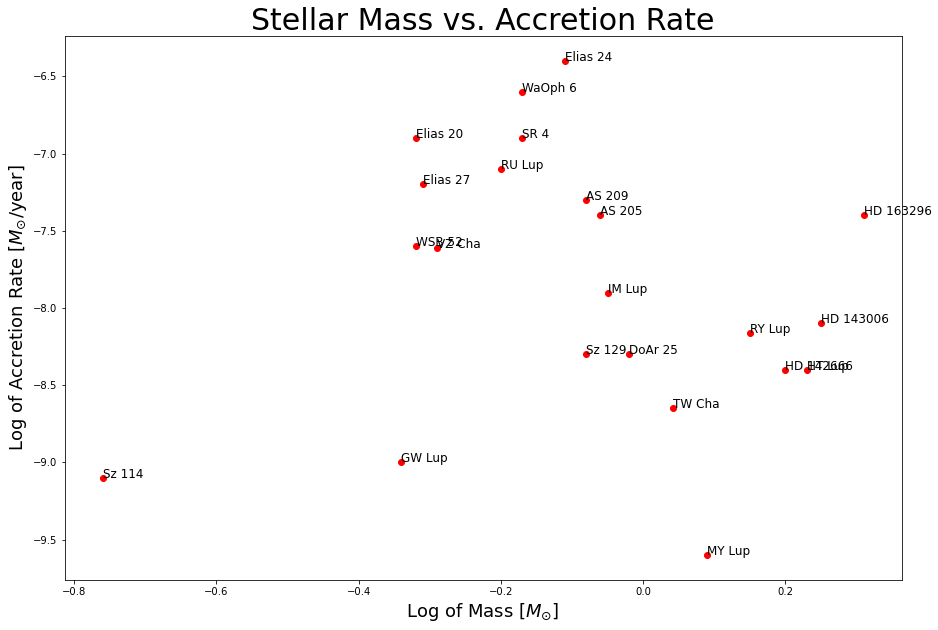

In [30]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mstar, AccRate, 'ro')
for i, (x, y) in enumerate(zip(Mstar, AccRate)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Log of Mass [$M_{\odot}$]',fontsize=18)
ax1.set_ylabel('Log of Accretion Rate [$M_{\odot}$/year]',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
ax1.set_title('Stellar Mass vs. Accretion Rate',fontsize=30)


plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

# 13b Stellar Mass vs Accretion 

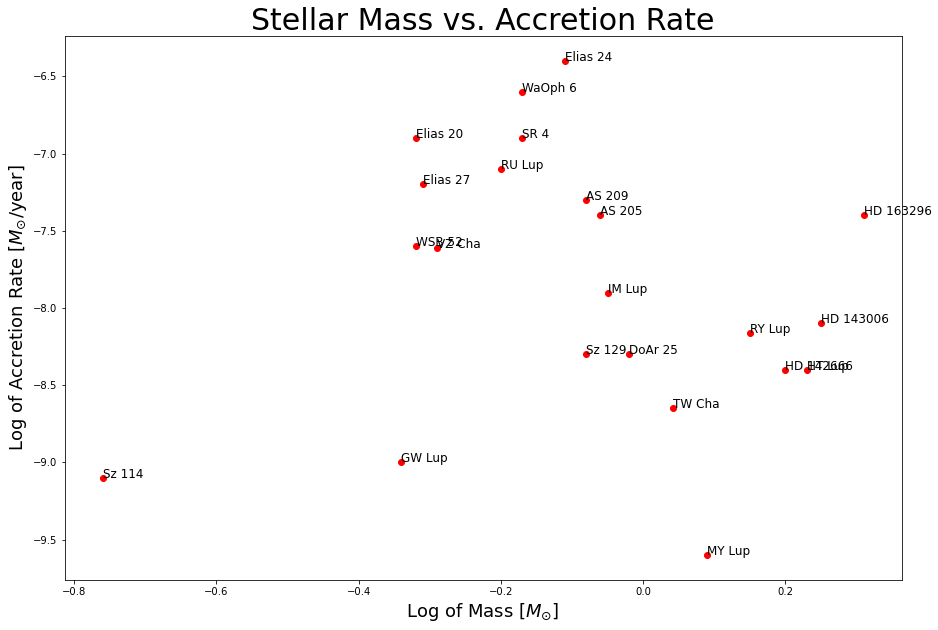

In [31]:
# define columns
df_massrate = pd.DataFrame(data, columns= ['Star','Log_Mstar','uncertainty_positive_Log_Mstar','uncertainty_negative_Log_Mstar','log_accretion_rate'])
# suppress rows with -99 values
df_massrateclean = df_massrate.loc[df_massrate['log_accretion_rate'] != -99]
#show table, 
#print (df_massrateclean)

# send values to plot
star_list = df_massrateclean['Star'].tolist()
AccRate = df_massrateclean['log_accretion_rate'].tolist()
Mstar = df_massrateclean['Log_Mstar'].tolist()
M_pos_unc = df_massrateclean['uncertainty_positive_Log_Mstar'].tolist()
M_neg_unc = df_massrateclean['uncertainty_negative_Log_Mstar'].tolist()

# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mstar, AccRate, 'ro')
for i, (x, y) in enumerate(zip(Mstar, AccRate)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Log of Mass [$M_{\odot}$]',fontsize=18)
ax1.set_ylabel('Log of Accretion Rate [$M_{\odot}$/year]',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
ax1.set_title('Stellar Mass vs. Accretion Rate',fontsize=30)


plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE


# 14. Disk Mass vs. Log of Accretion Rate

In [51]:
# define columns
df_diskmassrate = pd.DataFrame(data, columns= ['Star','Mdisk','log_accretion_rate','Program_ID'])
# suppress rows with -99 values
df_diskmassrateclean = df_diskmassrate.loc[df_diskmassrate['Mdisk'] != -99]
#show table, 
#print (df_diskmassrateclean)
# suppress rows with -99 values
df_diskmassrateclean2 = df_diskmassrateclean.loc[df_diskmassrateclean['log_accretion_rate'] != -99]
print (df_diskmassrateclean2)

# send values to plot
star_list = df_diskmassrateclean2['Star'].tolist()
AccRate = df_diskmassrateclean2['log_accretion_rate'].tolist()
Mdisk = df_diskmassrateclean2['Mdisk'].tolist()
Program = df_diskmassrateclean2['Program_ID'].tolist()

        Star     Mdisk  log_accretion_rate  Program_ID
0     HT Lup  0.014018               -8.40        1584
1     GW Lup  0.015015               -9.00        1282
2     IM Lup  0.059063               -7.90        1282
3     RU Lup  0.042619               -7.10        1584
4     Sz 114  0.007961               -9.10        1584
5     Sz 129  0.018565               -8.30        1584
6     MY Lup  0.016997               -9.60        1584
9     AS 205  0.029000               -7.40        1584
11  Elias 20  0.029000               -6.90        1584
12   DoAr 25  0.136000               -8.30        1584
17   WaOph 6  0.077000               -6.60        1282
18    AS 209  0.028000               -7.30        1584
21    TW Cha  0.008803               -8.65        1549
22    VZ Cha  0.018000               -7.61        1549
27    RY Lup  0.027342               -8.16        1640


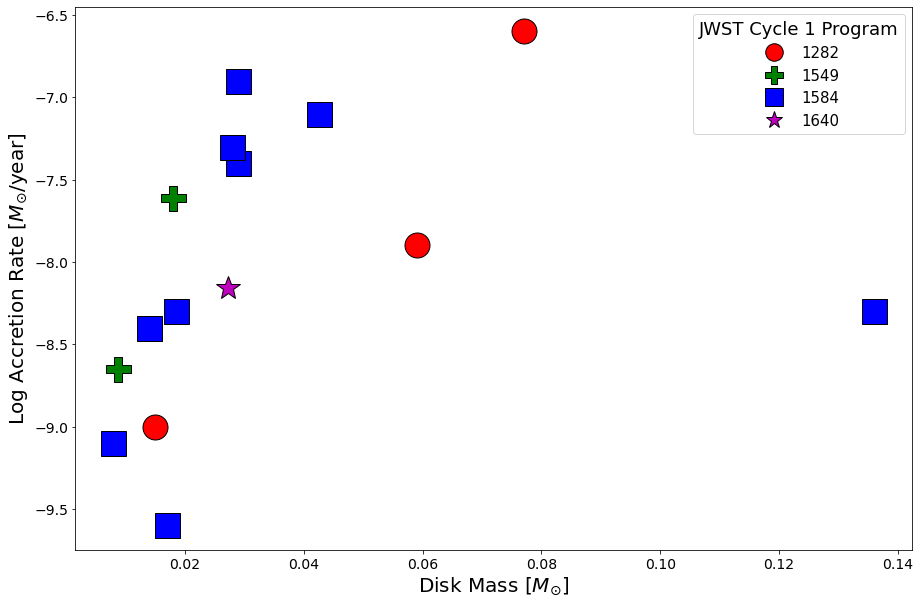

In [56]:
# x y plot
#fig=plt.figure(1,figsize=(15,10))
#ax1=fig.add_subplot(111)
#ax1.plot(Mdisk, AccRate, 'ro', markersize=12)
#for i, (x, y) in enumerate(zip(Mdisk, AccRate)):
    #ax1.text(x,y,star_list[i],fontsize=15)
#ax1.set_xlabel('Disk Mass [$M_{\odot}$]',fontsize=18)
#ax1.set_ylabel('Log of Accretion Rate [$M_{\odot}$/year]',fontsize=18)
# x and y limits
#ax1.set_xlim(0, 0.10)
#ax1.set_ylim(-10, -6)
#ax.grid()

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Disk Mass vs. Log of Accretion Rate',fontsize=30)

# Break up data by regions. This is to create the legend. I struggled to find a more succinct way. 
# But this will become unruly quickly as the 'z' variable becomes more complex.
# And will break if the data set changes!

# JWST 1584 list
eightyfour = df_diskmassrateclean2.loc[df_diskmassrateclean2['Program_ID'] == 1584]   
# Must be float type to assign the float value of spectral type back to letter value
eightyfourx = eightyfour['Mdisk'].tolist()
eightyfoury = eightyfour['log_accretion_rate'].tolist()

# JWST 1282 list
eightytwo = df_diskmassrateclean2.loc[df_diskmassrateclean2['Program_ID'] == 1282]
eightytwox = eightytwo['Mdisk'].tolist()
eightytwoy = eightytwo['log_accretion_rate'].tolist()

# JWST 1549 list
fortynine = df_diskmassrateclean2.loc[df_diskmassrateclean2['Program_ID'] == 1549]
fortyninex = fortynine['Mdisk'].tolist()
fortyniney = fortynine['log_accretion_rate'].tolist()

# JWST 1640 list
forty = df_diskmassrateclean2.loc[df_diskmassrateclean2['Program_ID'] == 1640]
fortyx = forty['Mdisk'].tolist()
fortyy = forty['log_accretion_rate'].tolist()

# plot:

fig, ax = plt.subplots(figsize=(15,10))
# Essentially, plot 4 plots on top of each other, 1 for each program:
eightytwoplt, = ax.plot(eightytwox,eightytwoy, "ro", markersize=25,markeredgecolor='black')
eightyfourplt, = ax.plot(eightyfourx,eightyfoury, "bs", markersize=25, markeredgecolor='black')
fortynineplt, = ax.plot(fortyninex,fortyniney, "gP", markersize=25,markeredgecolor='black')
fortyplt, = ax.plot(fortyx,fortyy, "m*", markersize=25,markeredgecolor='black')

#titles and labels
#ax.set_title('Disk Mass vs. Log of Accretion Rate')
ax.title.set_fontsize(25)
ax.set_xlabel('Disk Mass [$M_{\odot}$]')
ax.tick_params(axis='both', labelsize=14)
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Log Accretion Rate [$M_{\odot}$/year]')
ax.yaxis.label.set_fontsize(20)
# y limits
#ax.set_ylim(0, 8)
#ax.grid()

# add star names, for each plot
#for i, (x, y) in enumerate(zip(eightytwox,eightytwoy)):
 #   plt.text(x,y,star_list[i],fontsize=12, fontweight='bold',rotation=0, va='bottom',ha='left')
#for i, (x, y) in enumerate(zip(eightyfourx,eightyfoury)):
 #   plt.text(x,y,star_list[i],fontsize=12,fontweight='bold',rotation=0,va='bottom',ha='left')    
#for i, (x, y) in enumerate(zip(fortyninex,fortyniney)):
 #   plt.text(x,y,star_list[i],fontsize=12,fontweight='bold',rotation=0,va='bottom',ha='left')
#for i, (x, y) in enumerate(zip(fortyx,fortyy)):
 #   plt.text(x,y,star_list[i],fontsize=12,fontweight='bold',rotation=0,va='bottom',ha='left')  
    
# legend, named the 2 plot variables, and their assigned labels
ax.legend([eightytwoplt,fortynineplt,eightyfourplt,fortyplt], 
          ["1282", "1549","1584","1640"],
          fontsize=15, title='JWST Cycle 1 Program',title_fontsize=18,markerscale=.7)

# export plot as a PDF, create a new file name. Saves it in the same folder as journal. Remember to comment-out if making edits.
#plt.savefig('spectype_vs_age_prog6.28.pdf')   #, bbox_inches='tight')


# export plot as a PDF, create a new file name. Saves it in the same folder as journal. Remember to comment-out if making edits.
plt.savefig('Diskmass_v_LogAccRate_7.25.pdf')   #, bbox_inches='tight')

#save fig before you show it
plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

# 14.b  Disk Mass vs. Accretion Rate

In [34]:
# define columns
df_diskmassrate = pd.DataFrame(data, columns= ['Star','Mdisk','accretion_rate'])
# suppress rows with -99 values
df_diskmassrateclean = df_diskmassrate.loc[df_diskmassrate['Mdisk'] != -99]
#show table, 
#print (df_diskmassrateclean)
# suppress rows with -99 values
df_diskmassrateclean2 = df_diskmassrateclean.loc[df_diskmassrateclean['accretion_rate'] != -99]
print (df_diskmassrateclean2)

# send values to plot
star_list = df_diskmassrateclean2['Star'].tolist()
AccRate = df_diskmassrateclean2['accretion_rate'].tolist()
Mdisk = df_diskmassrateclean2['Mdisk'].tolist()




          Star     Mdisk  accretion_rate
0       HT Lup  0.014018             NaN
1       GW Lup  0.015015             NaN
2       IM Lup  0.059063             NaN
3       RU Lup  0.042619             NaN
4       Sz 114  0.007961             NaN
5       Sz 129  0.018565             NaN
6       MY Lup  0.016997             NaN
9       AS 205  0.029000             NaN
11    Elias 20  0.029000             NaN
12     DoAr 25  0.136000             NaN
17     WaOph 6  0.077000             NaN
18      AS 209  0.028000             NaN
21      TW Cha  0.008803             NaN
22      VZ Cha  0.018000             NaN
24  IRAS 04385  0.002455             NaN
26      CI Tau  0.040541             NaN
27      RY Lup  0.027342             NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

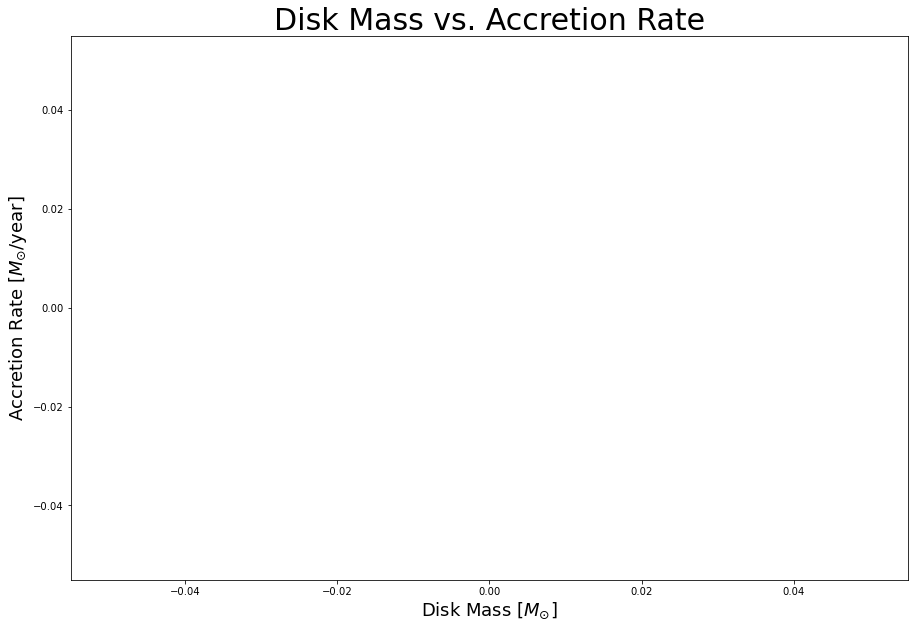

In [35]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mdisk, AccRate, 'ro', markersize=12)
for i, (x, y) in enumerate(zip(Mdisk, AccRate)):
    ax1.text(x,y,star_list[i],fontsize=15)
ax1.set_xlabel('Disk Mass [$M_{\odot}$]',fontsize=18)
ax1.set_ylabel('Accretion Rate [$M_{\odot}$/year]',fontsize=18)
# x and y limits
#ax1.set_xlim(0, 0.10)
#ax1.set_ylim(-10, -6)
#ax.grid()

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
ax1.set_title('Disk Mass vs. Accretion Rate',fontsize=30)

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

# 15 Spectral Type vs. Accrection Rate

In [36]:
# define columns
df_specacc = pd.DataFrame(data, columns= ['Star','Spectral_Type','log_accretion_rate'])
#print(df_specdisk)
# suppress rows with -99 values
df_specaccclean = df_specacc.loc[df_specacc['log_accretion_rate'] != -99]

print(df_specaccclean)

# Add a column to dataframe of spectral type as digits  # NOTE, currently pulling integer, not float, missing dec place
f = lambda s: s[0:2]
df_specaccclean['SpType2'] = df_specaccclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
f = lambda s: order[s[0]]+s[1]
df_specaccclean['SpType2'] = df_specaccclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_specaccclean2 = df_specaccclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

print(df_spec2)

# send values to plot
star_list = df_specaccclean2['Star'].tolist()
spectral_type2 = df_specaccclean2['SpType2'].tolist()
AccRate = df_specaccclean2['log_accretion_rate'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\960683124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specaccclean['SpType2'] = df_specaccclean['Spectral_Type'].apply(f)


         Star Spectral_Type  log_accretion_rate
0      HT Lup            K2               -8.40
1      GW Lup          M1.5               -9.00
2      IM Lup            K5               -7.90
3      RU Lup            K7               -7.10
4      Sz 114            M5               -9.10
5      Sz 129            K7               -8.30
6      MY Lup            K0               -9.60
7   HD 142666            A8               -8.40
8   HD 143006            G7               -8.10
9      AS 205            K5               -7.40
10       SR 4            K7               -6.90
11   Elias 20            M0               -6.90
12    DoAr 25            K5               -8.30
13   Elias 24            K5               -6.40
14   Elias 27            M0               -7.20
16     WSB 52            M1               -7.60
17    WaOph 6            K6               -6.60
18     AS 209            K5               -7.30
19  HD 163296            A1               -7.40
21     TW Cha            K7             

C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\960683124.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specaccclean['SpType2'] = df_specaccclean['SpType2'].apply(f)


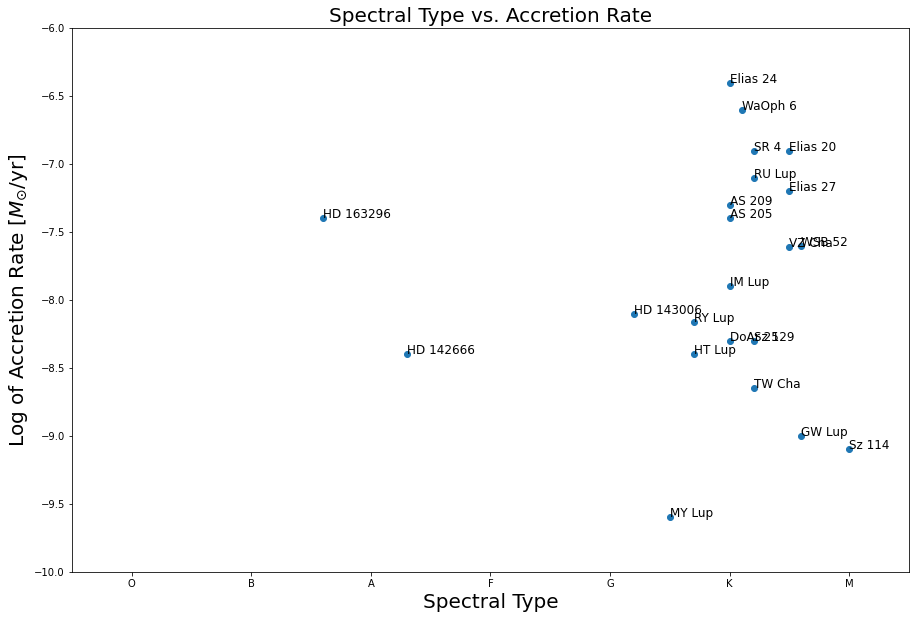

In [37]:
fig, ax = plt.subplots(figsize=(15,10)) 

# x and y limits
ax.set_xlim(0, 70)
ax.set_ylim(-10, -6)
#ax.grid()

#titles and labels
ax.set_title('Spectral Type vs. Accretion Rate')
ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Log of Accretion Rate [$M_{\odot}$/yr]')
ax.yaxis.label.set_fontsize(20)

#define x and y, may be redundant from push to list in above cell
ax.scatter(df_specaccclean2['SpType2'].astype(int), df_specaccclean2['log_accretion_rate'])
#add the star names, based on x and y def above
for i, (x, y) in enumerate(zip(df_specaccclean2['SpType2'].astype(float), df_specaccclean2['log_accretion_rate'])):
    ax.text(x,y,star_list[i],fontsize=12)
           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
#ax.tick_params(axis='x', labelsize=18)



plt.show()

# 16. Distance vs. Number of Dark Gaps (with Program markers)

         Star  dark_gap_number    Distance  Program_ID
1      GW Lup                2  155.201599        1282
2      IM Lup                1  155.824071        1282
3      RU Lup                4  157.508447        1584
4      Sz 114                1  156.759401        1584
5      Sz 129                2  160.129815        1584
6      MY Lup                2  157.157383        1584
7   HD 142666                3  146.251941        1584
8   HD 143006                2  167.338017        1584
10       SR 4                1  134.755567        1584
11   Elias 20                2  137.527760        1584
12    DoAr 25                3  138.160903        1584
13   Elias 24                2  139.258542        1584
14   Elias 27                1  110.067902        1584
15    DoAr 33                1  141.550079        1584
16     WSB 52                1  135.271617        1584
17    WaOph 6                1  122.527084        1282
18     AS 209                7  121.245470        1584
19  HD 163

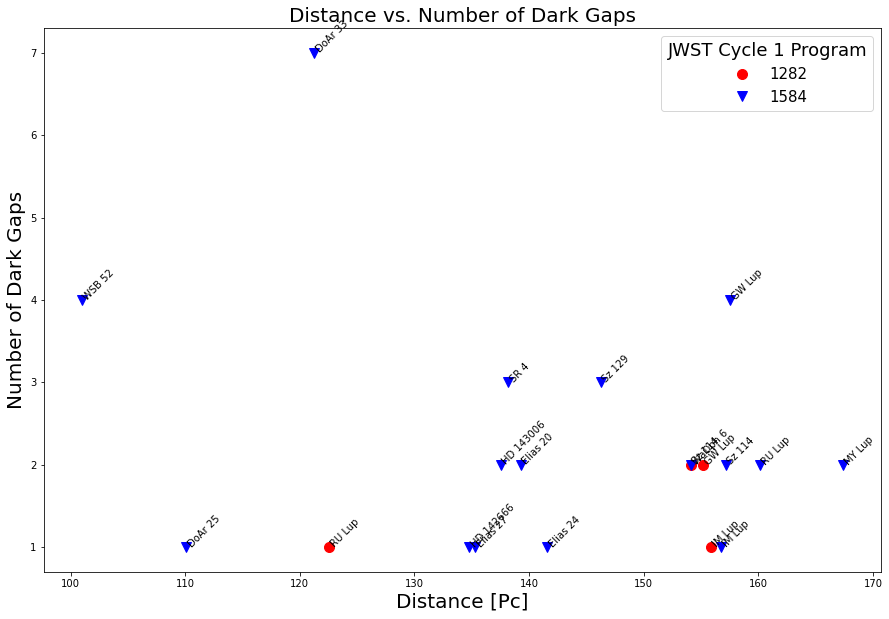

In [38]:
# Select columns from the csv file
df_distgaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','Distance','Program_ID'])
# suppress rows with -99 values
df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]
print(df_distgapsclean)

# Assign variable names to each column to simplify plotting 
star_list = df_distgapsclean['Star'].tolist()
dark_gap_number = df_distgapsclean['dark_gap_number'].tolist()
Distance = df_distgapsclean['Distance'].tolist()
Program = df_distgapsclean['Program_ID'].tolist()

# Break up data by regions. This is to create the legend. I struggled to find a more succinct way. 
# But this will become unruly quickly as the 'z' variable becomes more complex.

# JWST 1584 list
eightyfour = df_distgapsclean.loc[df_distgapsclean['Program_ID'] != 1282]   # <-- Need to figure out the = argument
eightyfourx = eightyfour['Distance'].tolist()
eightyfoury = eightyfour['dark_gap_number'].tolist()

# JWST 1282 list
eightytwo = df_distgapsclean.loc[df_distgapsclean['Program_ID'] != 1584]
eightytwox = eightytwo['Distance'].tolist()
eightytwoy = eightytwo['dark_gap_number'].tolist()

# plot:

fig, ax = plt.subplots(figsize=(15,10))
# Essentially, plot 2 plots on top of each other:
eightytwoplt, = ax.plot(eightytwox,eightytwoy, "ro", markersize=10)
eightyfourplt, = ax.plot(eightyfourx,eightyfoury, "bv", markersize=10)

#titles and labels
ax.set_title('Distance vs. Number of Dark Gaps')
ax.title.set_fontsize(20)
ax.set_xlabel('Distance [Pc]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Dark Gaps')
ax.yaxis.label.set_fontsize(20)

# add star names, for each plot
for i, (x, y) in enumerate(zip(eightytwox,eightytwoy)):
    plt.text(x,y,star_list[i],fontsize=10,rotation=45)
for i, (x, y) in enumerate(zip(eightyfourx,eightyfoury)):
    plt.text(x,y,star_list[i],fontsize=10,rotation=45)    
    
# legend, named the 2 plot variables, and their assigned labels
ax.legend([eightytwoplt,eightyfourplt], ["1282", "1584"],fontsize=15, title='JWST Cycle 1 Program',title_fontsize=18)

# 17. Distance vs. Number of Dark Gaps (with Region markers)

         Star  dark_gap_number    Distance     Region
1      GW Lup                2  155.201599      Lup I
2      IM Lup                1  155.824071     Lup II
3      RU Lup                4  157.508447     Lup II
4      Sz 114                1  156.759401    Lup III
5      Sz 129                2  160.129815     Lup IV
6      MY Lup                2  157.157383     Lup IV
7   HD 142666                3  146.251941  Upper Sco
8   HD 143006                2  167.338017  Upper Sco
10       SR 4                1  134.755567  Oph L1688
11   Elias 20                2  137.527760  Oph L1688
12    DoAr 25                3  138.160903  Oph L1688
13   Elias 24                2  139.258542  Oph L1688
14   Elias 27                1  110.067902  Oph L1688
15    DoAr 33                1  141.550079  Oph L1688
16     WSB 52                1  135.271617  Oph L1688
17    WaOph 6                1  122.527084   Oph N 3a
18     AS 209                7  121.245470   Oph N 3a
19  HD 163296               

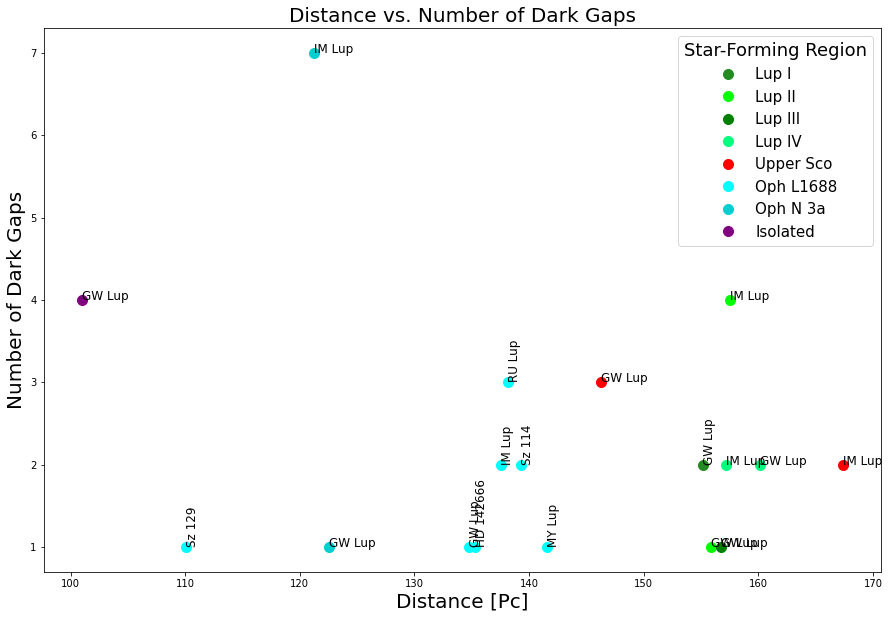

In [39]:
# Select columns from the csv file
df_distgaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','Distance','Region'])
# suppress rows with -99 values
df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]
print(df_distgapsclean)

# Assign variable names to each column to simplify plotting 
star_list = df_distgapsclean['Star'].tolist()
dark_gap_number = df_distgapsclean['dark_gap_number'].tolist()
Distance = df_distgapsclean['Distance'].tolist()
Region = df_distgapsclean['Region'].tolist()

# Break up data by regions. This is to create the legend. I struggled to find a more succinct way. 
# But this will become unruly quickly as the 'z' variable becomes more complex.
# Will also break if data set changes!

# Lup I list
LupI = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Lup I']
#print(LupI)
LupIx = LupI['Distance'].tolist()
LupIy = LupI['dark_gap_number'].tolist()

# Lup II list
LupII = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Lup II']
LupIIx = LupII['Distance'].tolist()
LupIIy = LupII['dark_gap_number'].tolist()

# Lup III list
LupIII = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Lup III']
LupIIIx = LupIII['Distance'].tolist()
LupIIIy = LupIII['dark_gap_number'].tolist()

# Lup IV list
LupIV = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Lup IV']
LupIVx = LupIV['Distance'].tolist()
LupIVy = LupIV['dark_gap_number'].tolist()

# Upper Sco list
UpperSco = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Upper Sco']
UpperScox = UpperSco['Distance'].tolist()
UpperScoy = UpperSco['dark_gap_number'].tolist()

# Oph L1688 list
OphL = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Oph L1688']
OphLx = OphL['Distance'].tolist()
OphLy = OphL['dark_gap_number'].tolist()

# Oph N 3a list
OphNa = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Oph N 3a']
OphNax = OphNa['Distance'].tolist()
OphNay = OphNa['dark_gap_number'].tolist()

# Isolated? list
Isolated = df_distgapsclean.loc[df_distgapsclean['Region'] == 'Isolated?']
Isolatedx = Isolated['Distance'].tolist()
Isolatedy = Isolated['dark_gap_number'].tolist()

# plot:

fig, ax = plt.subplots(figsize=(15,10))
# Essentially, plot 8 plots on top of each other:
LupIplt, = ax.plot(LupIx,LupIy, color='forestgreen', linestyle='None', marker='o', markersize=10)
LupIIplt, = ax.plot(LupIIx,LupIIy, color='lime', linestyle='None', marker='o', markersize=10)
LupIIIplt, = ax.plot(LupIIIx,LupIIIy, color='g', linestyle='None', marker='o', markersize=10)
LupIVplt, = ax.plot(LupIVx,LupIVy, color='springgreen', linestyle='None', marker='o', markersize=10)
UpperScoplt, = ax.plot(UpperScox,UpperScoy, "ro", markersize=10)
OphLplt, = ax.plot(OphLx,OphLy, color='aqua', linestyle='None', marker='o', markersize=10)
OphNaplt, = ax.plot(OphNax,OphNay, color='darkturquoise', linestyle='None', marker='o', markersize=10)
Isolatedplt, = ax.plot(Isolatedx,Isolatedy, color='purple', linestyle='None', marker='o', markersize=10)

#titles and labels
ax.set_title('Distance vs. Number of Dark Gaps')
ax.title.set_fontsize(20)
ax.set_xlabel('Distance [Pc]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Dark Gaps')
ax.yaxis.label.set_fontsize(20)

# add star names, for each plot
for i, (x, y) in enumerate(zip(LupIx,LupIy)):
    plt.text(x,y,star_list[i],fontsize=12, rotation=90, verticalalignment='bottom')
for i, (x, y) in enumerate(zip(LupIIx,LupIIy)):
    plt.text(x,y,star_list[i],fontsize=12)  
for i, (x, y) in enumerate(zip(LupIIIx,LupIIIy)):
    plt.text(x,y,star_list[i],fontsize=12)
for i, (x, y) in enumerate(zip(LupIVx,LupIVy)):
    plt.text(x,y,star_list[i],fontsize=12)
for i, (x, y) in enumerate(zip(UpperScox,UpperScoy)):
    plt.text(x,y,star_list[i],fontsize=12)
for i, (x, y) in enumerate(zip(OphLx,OphLy)):
    plt.text(x,y,star_list[i],fontsize=12, rotation=90, verticalalignment='bottom')
for i, (x, y) in enumerate(zip(OphNax,OphNay)):
    plt.text(x,y,star_list[i],fontsize=12)
for i, (x, y) in enumerate(zip(Isolatedx,Isolatedy)):
    plt.text(x,y,star_list[i],fontsize=12)
    
# legend, named the 2 plot variables, and their assigned labels
ax.legend([LupIplt,LupIIplt,LupIIIplt,LupIVplt,UpperScoplt,OphLplt,OphNaplt,Isolatedplt], 
          ['Lup I', 'Lup II','Lup III','Lup IV','Upper Sco','Oph L1688','Oph N 3a','Isolated'],
          fontsize=15, title='Star-Forming Region',title_fontsize=18)

# 18. Spectral Type vs. Age (JWST Program)

C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\229609628.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specclean['SpType2'] = df_specclean['Spectral_Type'].apply(f)
C:\Users\pheretz\AppData\Local\Temp\ipykernel_2148\229609628.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specclean['SpType2'] = df_specclean['SpType2'].apply(f)


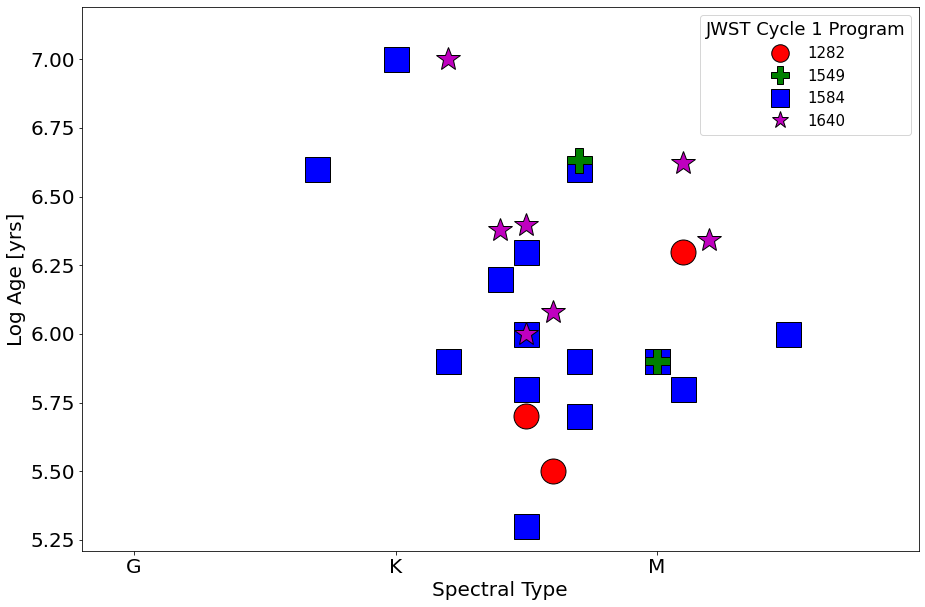

In [57]:
# Select columns from the csv file
#df_distgaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','Distance','Program_ID'])
# suppress rows with -99 values
#df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]
#print(df_distgapsclean)

# define columns
df_spec = pd.DataFrame(data, columns= ['Star','Spectral_Type','log_tstar','Program_ID'])
# suppress rows with -99 values
df_specclean = df_spec.loc[df_spec['log_tstar'] != -99]

#print(df_specclean)

# Add a column to dataframe of spectral type as digits  
f = lambda s: s[0:2]
df_specclean['SpType2'] = df_specclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
# NOTE, currently pulling integer, not float, missing dec place. Not sure how to amend instruction #########
f = lambda s: order[s[0]]+s[1]
df_specclean['SpType2'] = df_specclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_spec2 = df_specclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

#print(df_spec2)

# Assign variable names to each column to simplify plotting 
# May be redundant
star_list = df_spec2['Star'].tolist()
spectral_type2 = df_spec2['SpType2'].tolist()
star_age = df_spec2['log_tstar'].tolist()
Program = df_spec2['Program_ID'].tolist()


# Break up data by regions. This is to create the legend. I struggled to find a more succinct way. 
# But this will become unruly quickly as the 'z' variable becomes more complex.
# And will break if the data set changes!

# JWST 1584 list
eightyfour = df_spec2.loc[df_spec2['Program_ID'] == 1584]   
# Must be float type to assign the float value of spectral type back to letter value
eightyfourx = eightyfour['SpType2'].astype(float)
eightyfoury = eightyfour['log_tstar'].tolist()

# JWST 1282 list
eightytwo = df_spec2.loc[df_spec2['Program_ID'] == 1282]
eightytwox = eightytwo['SpType2'].astype(float)
eightytwoy = eightytwo['log_tstar'].tolist()

# JWST 1549 list
fortynine = df_spec2.loc[df_spec2['Program_ID'] == 1549]
fortyninex = fortynine['SpType2'].astype(float)
fortyniney = fortynine['log_tstar'].tolist()

# JWST 1640 list
forty = df_spec2.loc[df_spec2['Program_ID'] == 1640]
fortyx = forty['SpType2'].astype(float)
fortyy = forty['log_tstar'].tolist()

# plot:

fig, ax = plt.subplots(figsize=(15,10))
# Essentially, plot 4 plots on top of each other, 1 for each program:
eightytwoplt, = ax.plot(eightytwox,eightytwoy, "ro", markersize=25,markeredgecolor='black')
eightyfourplt, = ax.plot(eightyfourx,eightyfoury, "bs", markersize=25,markeredgecolor='black')
fortynineplt, = ax.plot(fortyninex,fortyniney, "gP", markersize=25,markeredgecolor='black')
fortyplt, = ax.plot(fortyx,fortyy, "m*", markersize=25,markeredgecolor='black')

#titles and labels
#ax.set_title('Spectral Type vs. Age')
ax.title.set_fontsize(25)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Log Age [yrs]')
ax.yaxis.label.set_fontsize(20)
# y limits
#ax.set_ylim(0, 8)
#ax.grid()

# Set Spectral ticks            
ax.set_xticks(range(0,70,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.set_xlim(38, 70)
ax.tick_params(axis='both', labelsize=20)

# add star names, for each plot
#for i, (x, y) in enumerate(zip(eightytwox,eightytwoy)):
 #   plt.text(x,y,star_list[i],fontsize=10, rotation=0, va='top')
#for i, (x, y) in enumerate(zip(eightyfourx,eightyfoury)):
 #   plt.text(x,y,star_list[i],fontsize=10,rotation=0,va='top')    
#for i, (x, y) in enumerate(zip(fortyninex,fortyniney)):
 #   plt.text(x,y,star_list[i],fontsize=10,rotation=0)
#for i, (x, y) in enumerate(zip(fortyx,fortyy)):
 #   plt.text(x,y,star_list[i],fontsize=10,rotation=0)  
    
# legend, named the 2 plot variables, and their assigned labels
ax.legend([eightytwoplt,fortynineplt,eightyfourplt,fortyplt], 
          ["1282", "1549","1584","1640"],
          fontsize=15, title='JWST Cycle 1 Program',title_fontsize=18,markerscale=.7)

# export plot as a PDF, create a new file name. Saves it in the same folder as journal. Remember to comment-out if making edits.
plt.savefig('spectype_vs_age_prog7.29.pdf')   #, bbox_inches='tight')


# 17b Distance vs. Number of Dark Gaps (Region Markers)

In [41]:
# Select columns from the csv file
df_distgaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','Distance','Region'])
# suppress rows with -99 values
df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]
print(df_distgapsclean)

ggplot()

         Star  dark_gap_number    Distance     Region
1      GW Lup                2  155.201599      Lup I
2      IM Lup                1  155.824071     Lup II
3      RU Lup                4  157.508447     Lup II
4      Sz 114                1  156.759401    Lup III
5      Sz 129                2  160.129815     Lup IV
6      MY Lup                2  157.157383     Lup IV
7   HD 142666                3  146.251941  Upper Sco
8   HD 143006                2  167.338017  Upper Sco
10       SR 4                1  134.755567  Oph L1688
11   Elias 20                2  137.527760  Oph L1688
12    DoAr 25                3  138.160903  Oph L1688
13   Elias 24                2  139.258542  Oph L1688
14   Elias 27                1  110.067902  Oph L1688
15    DoAr 33                1  141.550079  Oph L1688
16     WSB 52                1  135.271617  Oph L1688
17    WaOph 6                1  122.527084   Oph N 3a
18     AS 209                7  121.245470   Oph N 3a
19  HD 163296               

NameError: name 'ggplot' is not defined

# 19 Dist vs Lumin vs Region

          Star  log_Lstar    Distance                  Region
0       HT Lup   0.740000  153.474566                   Lup I
1       GW Lup  -0.480000  155.201599                   Lup I
2       IM Lup   0.410000  155.824071                  Lup II
3       RU Lup   0.160000  157.508447                  Lup II
4       Sz 114  -0.690000  156.759401                 Lup III
5       Sz 129  -0.360000  160.129815                  Lup IV
6       MY Lup  -0.060000  157.157383                  Lup IV
7    HD 142666   0.960000  146.251941               Upper Sco
8    HD 143006   0.580000  167.338017               Upper Sco
9       AS 205   0.330000  132.059618               Upper Sco
10        SR 4   0.070000  134.755567               Oph L1688
11    Elias 20   0.350000  137.527760               Oph L1688
12     DoAr 25  -0.020000  138.160903               Oph L1688
13    Elias 24   0.780000  139.258542               Oph L1688
14    Elias 27  -0.040000  110.067902               Oph L1688
15     D

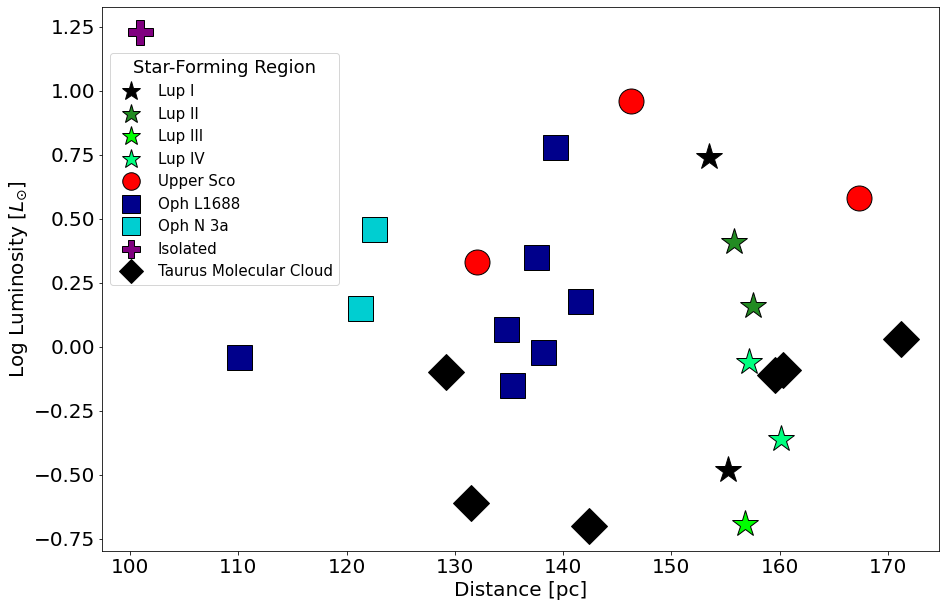

In [58]:
# Select columns from the csv file
df_distlumin = pd.DataFrame(data, columns= ['Star','log_Lstar','Distance','Region'])
# suppress rows with -99 values
#df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]
print(df_distlumin)

# Assign variable names to each column to simplify plotting 
star_list = df_distlumin['Star'].tolist()
dark_gap_number = df_distlumin['log_Lstar'].tolist()
Distance = df_distlumin['Distance'].tolist()
Region = df_distlumin['Region'].tolist()

# Break up data by regions. This is to create the legend. I struggled to find a more succinct way. 
# But this will become unruly quickly as the 'z' variable becomes more complex.
# Will also break if data set changes!

# Lup I list
LupI = df_distlumin.loc[df_distlumin['Region'] == 'Lup I']
#print(LupI)
LupIx = LupI['Distance'].tolist()
LupIy = LupI['log_Lstar'].tolist()

# Lup II list
LupII = df_distlumin.loc[df_distlumin['Region'] == 'Lup II']
LupIIx = LupII['Distance'].tolist()
LupIIy = LupII['log_Lstar'].tolist()

# Lup III list
LupIII = df_distlumin.loc[df_distlumin['Region'] == 'Lup III']
LupIIIx = LupIII['Distance'].tolist()
LupIIIy = LupIII['log_Lstar'].tolist()

# Lup IV list
LupIV = df_distlumin.loc[df_distlumin['Region'] == 'Lup IV']
LupIVx = LupIV['Distance'].tolist()
LupIVy = LupIV['log_Lstar'].tolist()

# Upper Sco list
UpperSco = df_distlumin.loc[df_distlumin['Region'] == 'Upper Sco']
UpperScox = UpperSco['Distance'].tolist()
UpperScoy = UpperSco['log_Lstar'].tolist()

# Oph L1688 list
OphL = df_distlumin.loc[df_distlumin['Region'] == 'Oph L1688']
OphLx = OphL['Distance'].tolist()
OphLy = OphL['log_Lstar'].tolist()

# Oph N 3a list
OphNa = df_distlumin.loc[df_distlumin['Region'] == 'Oph N 3a']
OphNax = OphNa['Distance'].tolist()
OphNay = OphNa['log_Lstar'].tolist()

# Taurus Molecular Cloud
Taurus = df_distlumin.loc[df_distlumin['Region'] == 'Taurus Molecular Cloud']
Taurusx = Taurus['Distance'].tolist()
Taurusy = Taurus['log_Lstar'].tolist()


# Isolated? list
Isolated = df_distlumin.loc[df_distlumin['Region'] == 'Isolated?']
Isolatedx = Isolated['Distance'].tolist()
Isolatedy = Isolated['log_Lstar'].tolist()

# plot:

fig, ax = plt.subplots(figsize=(15,10))
# Essentially, plot 8 plots on top of each other:
LupIplt, = ax.plot(LupIx,LupIy, color='black', linestyle='None', marker='*', markersize=28,markeredgecolor='black')
LupIIplt, = ax.plot(LupIIx,LupIIy, color='forestgreen', linestyle='None', marker='*', markersize=28,markeredgecolor='black')
LupIIIplt, = ax.plot(LupIIIx,LupIIIy, color='lime', linestyle='None', marker='*', markersize=28,markeredgecolor='black')
LupIVplt, = ax.plot(LupIVx,LupIVy, color='springgreen', linestyle='None', marker='*', markersize=28,markeredgecolor='black')
UpperScoplt, = ax.plot(UpperScox,UpperScoy, "ro", markersize=25,markeredgecolor='black')
OphLplt, = ax.plot(OphLx,OphLy, color='darkblue', linestyle='None', marker='s', markersize=25,markeredgecolor='black')
OphNaplt, = ax.plot(OphNax,OphNay, color='darkturquoise', linestyle='None', marker='s', markersize=25,markeredgecolor='black')
Isolatedplt, = ax.plot(Isolatedx,Isolatedy, color='purple', linestyle='None', marker='P', markersize=25,markeredgecolor='black')
Taurusplt, = ax.plot(Taurusx,Taurusy, color='black', linestyle='None', marker='D', markersize=25,markeredgecolor='black')

#titles and labels
#ax.set_title('Distance vs. Log Luminosity')
ax.title.set_fontsize(25)
ax.set_xlabel('Distance [pc]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Log Luminosity [$L_{\odot}$]')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis='both', labelsize=20)
#ax.set_ylim(-.75, 1.5)

# add star names, for each plot
#for i, (x, y) in enumerate(zip(LupIx,LupIy)):
 #   plt.text(x,y,star_list[i],fontsize=12, rotation=90, verticalalignment='bottom')
#for i, (x, y) in enumerate(zip(LupIIx,LupIIy)):
 #   plt.text(x,y,star_list[i],fontsize=12)  
#for i, (x, y) in enumerate(zip(LupIIIx,LupIIIy)):
 #   plt.text(x,y,star_list[i],fontsize=12)
#for i, (x, y) in enumerate(zip(LupIVx,LupIVy)):
 #   plt.text(x,y,star_list[i],fontsize=12)
#for i, (x, y) in enumerate(zip(UpperScox,UpperScoy)):
 #   plt.text(x,y,star_list[i],fontsize=12)
#for i, (x, y) in enumerate(zip(OphLx,OphLy)):
 #   plt.text(x,y,star_list[i],fontsize=12, rotation=90, verticalalignment='bottom')
#for i, (x, y) in enumerate(zip(OphNax,OphNay)):
 #   plt.text(x,y,star_list[i],fontsize=12)
#for i, (x, y) in enumerate(zip(Isolatedx,Isolatedy)):
 #   plt.text(x,y,star_list[i],fontsize=12)
    
# legend, named the 2 plot variables, and their assigned labels
ax.legend([LupIplt,LupIIplt,LupIIIplt,LupIVplt,UpperScoplt,OphLplt,OphNaplt,Isolatedplt,Taurusplt], 
          ['Lup I', 'Lup II','Lup III','Lup IV','Upper Sco','Oph L1688','Oph N 3a','Isolated','Taurus Molecular Cloud'],
          fontsize=15, title='Star-Forming Region',title_fontsize=18,markerscale=.7,loc='upper left',bbox_to_anchor=(0, .93),ncol=1)

plt.savefig('distvlumin.7.29.pdf') 

          Star  Program_ID     Mstar     Mdisk
0       HT Lup        1584  1.698244  0.014018
1       GW Lup        1282  0.457088  0.015015
2       IM Lup        1282  0.891251  0.059063
3       RU Lup        1584  0.630957  0.042619
4       Sz 114        1584  0.173780  0.007961
5       Sz 129        1584  0.831764  0.018565
6       MY Lup        1584  1.230269  0.016997
9       AS 205        1584  0.870964  0.029000
11    Elias 20        1584  0.478630  0.029000
12     DoAr 25        1584  0.954993  0.136000
17     WaOph 6        1282  0.676083  0.077000
18      AS 209        1584  0.831764  0.028000
21      TW Cha        1549  1.100000  0.008803
22      VZ Cha        1549  0.512861  0.018000
24  IRAS 04385        1640  0.562341  0.002455
26      CI Tau        1640  0.890000  0.040541
27      RY Lup        1640  1.412538  0.027342


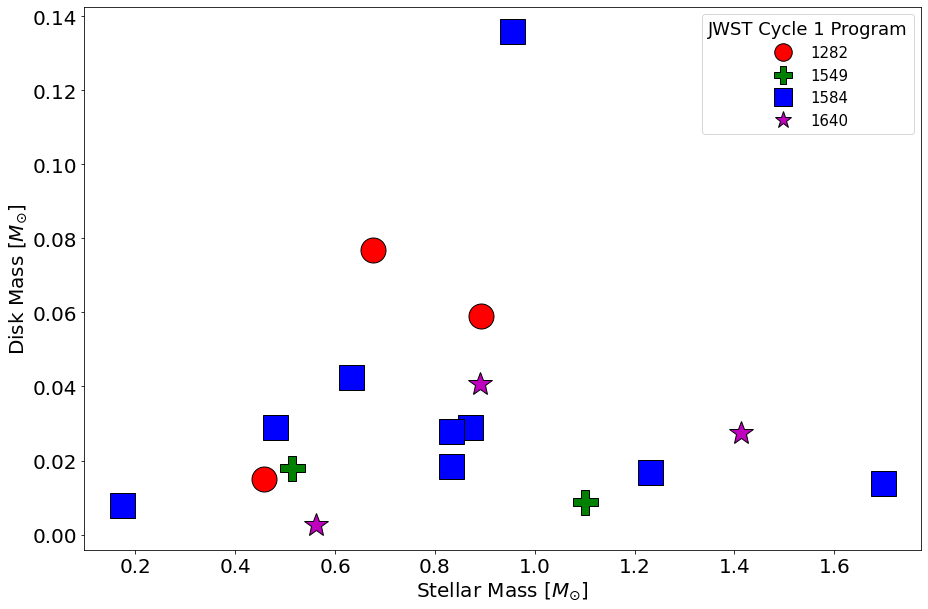

In [59]:
# define columns
df = pd.DataFrame(data, columns= ['Star','Program_ID','Mstar','Mdisk'])
# suppress rows with -99 values
df_loc = df.loc[df['Mdisk'] != -99]
# show table, print (df_loc)
print(df_loc)

# send values to plot
star_list = df_loc['Star'].tolist()
Mstar = df_loc['Mstar'].tolist()
Mdisk = df_loc['Mdisk'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()



# JWST 1584 list
eightyfour = df_loc.loc[df_loc['Program_ID'] == 1584]   
# Must be float type to assign the float value of spectral type back to letter value
eightyfourx = eightyfour['Mstar'].tolist()
eightyfoury = eightyfour['Mdisk'].tolist()

# JWST 1282 list
eightytwo = df_loc.loc[df_loc['Program_ID'] == 1282]
eightytwox = eightytwo['Mstar'].tolist()
eightytwoy = eightytwo['Mdisk'].tolist()

# JWST 1549 list
fortynine = df_loc.loc[df_loc['Program_ID'] == 1549]
fortyninex = fortynine['Mstar'].tolist()
fortyniney = fortynine['Mdisk'].tolist()

# JWST 1640 list
forty = df_loc.loc[df_loc['Program_ID'] == 1640]
fortyx = forty['Mstar'].tolist()
fortyy = forty['Mdisk'].tolist()

# plot:

fig, ax = plt.subplots(figsize=(15,10))
# Essentially, plot 4 plots on top of each other, 1 for each program:
eightytwoplt, = ax.plot(eightytwox,eightytwoy, "ro", markersize=25,markeredgecolor='black')
eightyfourplt, = ax.plot(eightyfourx,eightyfoury, "bs", markersize=25,markeredgecolor='black')
fortynineplt, = ax.plot(fortyninex,fortyniney, "gP", markersize=25,markeredgecolor='black')
fortyplt, = ax.plot(fortyx,fortyy, "m*", markersize=25,markeredgecolor='black')

#titles and labels
#ax.set_title('Stellar Mass vs. Disk Mass')
ax.title.set_fontsize(25)
ax.set_xlabel('Stellar Mass [$M_{\odot}$]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Disk Mass [$M_{\odot}$]')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis='both', labelsize=20)


# legend, named the 2 plot variables, and their assigned labels
ax.legend([eightytwoplt,fortynineplt,eightyfourplt,fortyplt], 
          ["1282", "1549","1584","1640"],
          fontsize=15, title='JWST Cycle 1 Program',title_fontsize=18,markerscale=.7)

# export plot as a PDF, create a new file name. Saves it in the same folder as journal. Remember to comment-out if making edits.
#plt.savefig('spectype_vs_age_prog6.28.pdf')   #, bbox_inches='tight')


# export plot as a PDF, create a new file name. Saves it in the same folder as journal. Remember to comment-out if making edits.
#plt.savefig('Diskmass_v_LogAccRate_7.25.pdf')   #, bbox_inches='tight')

#save fig before you show it
plt.show()
